In [2]:
from pathlib import Path
from pprint import pprint

# for array operations
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# for panel data
import pandas as pd
pd.set_option("display.max_columns", None) # allow all columns to be displayed
pd.set_option("display.max_rows", None) # allow all rows to be displayed

# if JSON file containing header data is not available, 
# we need a packaged version of our PL2 file reader 
# to extract information that BombCell needs
# import pypl2

# force notebook to reload modules automatically
# when executing user code
%load_ext autoreload
%autoreload 2

# import bombcell package
import bombcell as bc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# define paths
root_dir = Path(r"/Users/jf5479/Downloads/")

# find kilosort directory
ks_dir = list(root_dir.glob("**/params.py"))[0].parent # NOTE: This assumes there is only one kilosort4 directory inside the root directory

# bombcell's convention is to save its data inside the kilosort directory. 
# we can put it somewhere else if needed.
save_path = ks_dir / "bombcell" # We can put this somewhere else if necessary

# bombcell requires a function called gain_to_uV which is related to 
# the m_coeffToConvertToUnits field available in the PL2 file format's
# analog channel headers. If the JSON file is not available, we need 
# to get the information we require from the PL2 directly.
#pl2_file_path = list(root_dir.glob("*.pl2"))[0]

# bombcell requires a binary file in raw-interleaved format from which to
# extract waveforms. Our RIL .bin files contain completely raw wideband data - 
# unfiltered without common average referencing or drift correction. Pointing
# BombCell to the .bin files would be a mistake. It would be better to point
# it at temp_wh.dat instead - this is generated by Kilosort after drift correction,
# filtering, and common average referencing have been applied.
dat_file_path = None #ks_dir / "temp_wh.dat"

In [4]:
# retrieve gain_to_uV directly from PL2
# pl2 = pypl2.PL2FileReader(str(pl2_file_path))
# channel_name = pl2.get_source_channel_names("WB")[0]
# gain_to_V = pl2.get_analog_channel_info(channel_name=channel_name).coeff_to_convert_to_units
# gain_to_uV = gain_to_V * 1.e6 # convert from volts to microvolts

# an alternative would be to extract this information from the header .json file generated by SDP

# hard coded for now
gain_to_uV = 0.18317874024609845

In [5]:
# load default parameters
param = bc.get_default_parameters(
    kilosort_path=ks_dir, 
    raw_file=dat_file_path, 
    gain_to_uV=gain_to_uV
    )

In [6]:
# set recording setup parameters

# Plexon records wideband data at 40 kHz.
param["ephys_sample_rate"] = 40000

# The number of channels in temp_wh.dat reflects how many channels were "bad". 
# The easiest way to supply the correct number of channels is by counting the
# number of channels in channel_map.npy
# params.py file that gets outputted by Kilosort4.
channel_map = np.load(ks_dir / "channel_map.npy")
param["nChannels"] = len(channel_map)

# Unlike NeuroPixels, PL2 files do not include Sync channels
param["nSyncChannels"] = 0

In [7]:
# Some setup parameters control whether values are recalculated on successive runs
param["reextractRaw"] = False #True                    # default is False
param["recomputeDuplicateSpikes"]  = True       # default is False



In [8]:
# some setup parameters control whether certain BombCell operations take place
param["removeDuplicates"] = False               # default is False
param["detrendWaveform"] = True                 # default is True
param["decompress_data"] = False                # default is True (though compressed data is not always present)
param["computeTimeChunks"] = False              # default is False
param["computeDrift"] = False                   # default is False
param["computeSpatialDecay"] = True             # default is True, but this will be overridden because SiNAPS y-pitch is 30 um
param["computeDistanceMetrics"] = True          # default is False
param["splitGoodAndMua_NonSomatic"] = False     # default is False
param["keep_only_somatic"] = True               # default is True - this is a placeholder because the parameter is defined but not used anywhere

In [9]:
# The default value for duplicateSpikeWindow_s does not make sense given our sample rate (only matters if param["removeDuplicates"] = True)
param["duplicateSpikeWindow_s"] = 25.0e-6

/Users/jf5479/bombcell/pyBombCell/bombcell/loading_utils.py:55: RuntimeWarning: divide by zero encountered in matmul
  templates_waveforms[t, :, :] = templates_waveforms_whitened[t, :, :].squeeze() @ winv
/Users/jf5479/bombcell/pyBombCell/bombcell/loading_utils.py:55: RuntimeWarning: overflow encountered in matmul
  templates_waveforms[t, :, :] = templates_waveforms_whitened[t, :, :].squeeze() @ winv
/Users/jf5479/bombcell/pyBombCell/bombcell/loading_utils.py:55: RuntimeWarning: invalid value encountered in matmul
  templates_waveforms[t, :, :] = templates_waveforms_whitened[t, :, :].squeeze() @ winv


🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: /Users/jf5479/Downloads
Results will be saved to: /Users/jf5479/Downloads/bombcell

Loading ephys data...
Loaded ephys data: 84 units, 1,466,638 spikes

⚙️ Computing quality metrics for 84 units...
   (Progress bar will appear below)


Computing bombcell quality metrics: 100%|██████████| 84/84 units



Saving GUI visualization data...
GUI visualization data saved to: /Users/jf5479/Downloads/bombcell/for_GUI/gui_data.pkl
   Generated spatial decay fits: 84/84 units
   Generated amplitude fits: 84/84 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


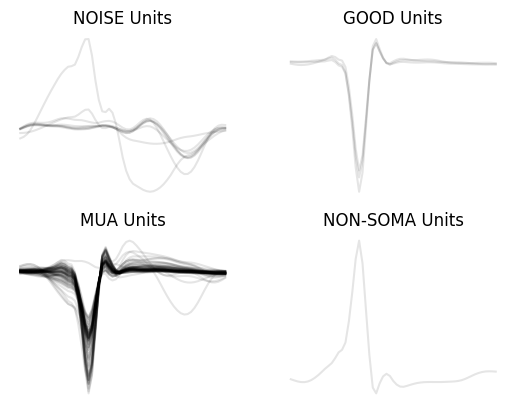

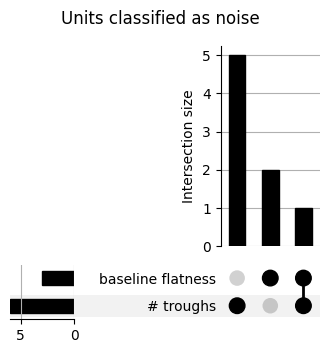

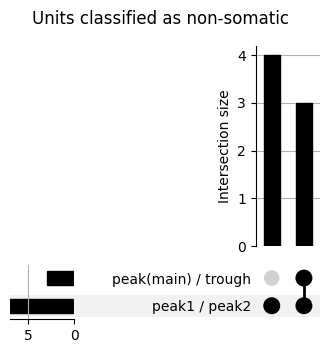

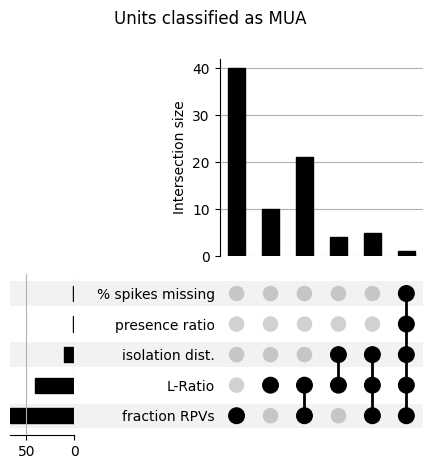

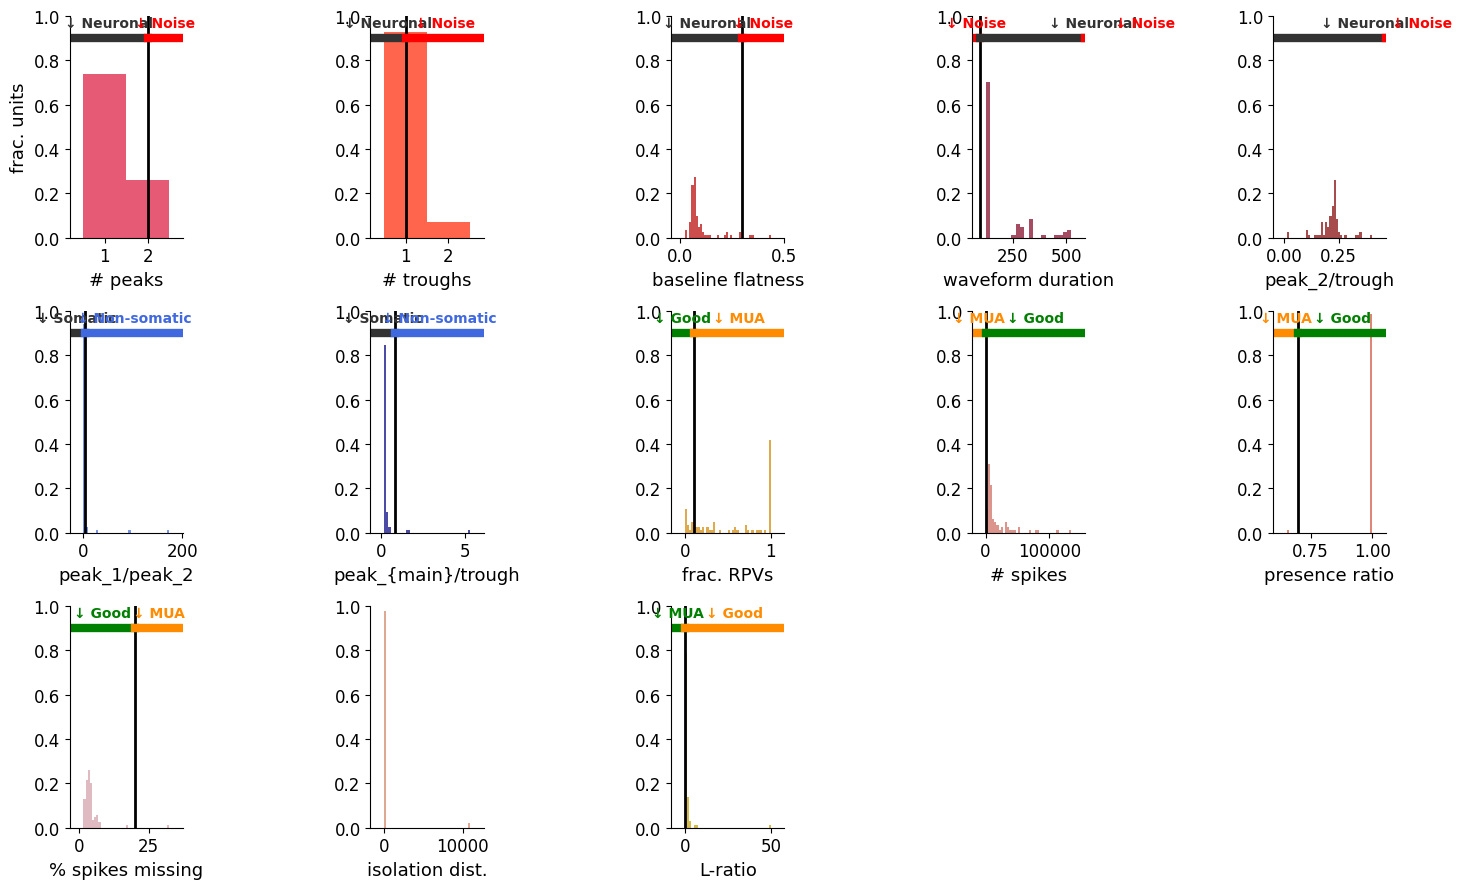


Saving results...
All expected metrics were successfully saved.


In [10]:
# Run bombcell with this command

quality_metrics, param, unit_type, unit_type_string = bc.run_bombcell(ks_dir, save_path, param)

In [20]:
quality_metrics['isolationDistance']

array([   40.29457966,    12.45076593,            nan,    34.0838187 ,
          55.25711151,    46.13548578,    74.85866684,    77.6328868 ,
          28.82956236,            nan,    28.28277832,    24.15634229,
                  nan,            nan,    17.48145932,            nan,
                  nan,            nan,            nan,            nan,
          45.45843728,            nan,    12.04436241,    17.10570705,
                  nan,    37.51363928,            nan,            nan,
          29.12753901,    28.67356919,            nan,    55.76914486,
                  nan,    23.81381237,    17.36418166, 10924.72387216,
          25.78263151,    18.58812037,            nan,            nan,
          53.23099141,    33.19985256,            nan,            nan,
          22.54379455,    22.63755709,    19.24959433,    23.25846918,
          25.38618089,    20.39943343,    19.43767105,    28.20950389,
          43.39674775,            nan,   124.39584902,            nan,
      